In [2]:
"""
Code for accommodating the graph-making need of ECON 3229-2 Money, Banking, and Financial Systems 

University of Missouri-Columbia

Fangda Wang

Fall 2017


https://github.com/vitanova
"""

# This file is aimed to demonstate the usefulness of the code I wrote before
# I changed several parameters in 1 min or 2, and a new graph is plotted as required

import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt

#this is a third-party api for manipulating fred data
from fred import Fred

#first, use the api key to get access to fred, all data in dictionary format
fr = Fred(api_key='4bba000775edea91bc01729d217cf3da', response_type='dict') ## <--- replacing with your own key

#now, use the series id to get observations
Y10=fr.series.observations(series_id="PCDG") ## <--- make change: series_id
Y025=fr.series.observations(series_id="PCEC") ## <--- make change: ibid
Y1=fr.series.observations(series_id="PCND") ## <--- make change: ibid
Y2=fr.series.observations(series_id="PCESV") ## <--- make change: ibid
nber=fr.series.observations(series_id="USREC") 



#convert the dictionary data to data frame
y10=pd.DataFrame.from_dict(Y10)
y025=pd.DataFrame.from_dict(Y025)
y1=pd.DataFrame.from_dict(Y1)
y2=pd.DataFrame.from_dict(Y2)
NBER=pd.DataFrame.from_dict(nber)

y10.columns = 'date', 'end', 'start', 'pcdg'
y025.columns = 'date', 'end', 'start', 'pcec'
y1.columns = 'date', 'end', 'start', 'pcnd'
y2.columns = 'date', 'end', 'start', 'pcesv'
NBER.columns = 'date', 'end', 'start', 'nber'


#merge the two tables and use date as key
al=pd.merge(y10, y025, how='left', on='date')
al=pd.merge(al, y1, how='left', on='date')
al=pd.merge(al, y2, how='left', on='date')
al=pd.merge(al, NBER, how='left', on='date')

al=al.drop('end_x', axis=1)
al=al.drop('start_x', axis=1)
al=al.drop('end_y', axis=1)
al=al.drop('start_y', axis=1)
al=al.drop('end', axis=1)
al=al.drop('start', axis=1)

al

C:\Anaconda3\lib\site-packages\fred\helpers\__init__.py:36: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  frame = frame.convert_objects(convert_numeric=True)
C:\Anaconda3\lib\site-packages\pandas\core\internals.py:3224: FutureWarning: Passing in 'datetime64' dtype with no frequency is deprecated and will raise in a future version. Please pass in 'datetime64[ns]' instead.
  return self.apply('astype', dtype=dtype, **kwargs)


,date,pcdg,pcec,pcnd,pcesv,nber
0,1946-01-01,NaN,NaN,NaN,NaN,0
1,1946-04-01,NaN,NaN,NaN,NaN,0
2,1946-07-01,NaN,NaN,NaN,NaN,0
3,1946-10-01,NaN,NaN,NaN,NaN,0
4,1947-01-01,20.721,156.288,74.872,60.695,0
5,1947-04-01,21.352,160.158,76.898,61.908,0
6,1947-07-01,21.770,163.667,78.648,63.249,0
7,1947-10-01,23.487,167.797,79.966,64.344,0
8,1948-01-01,23.548,170.500,81.546,65.406,0
9,1948-04-01,24.019,174.272,83.169,67.084,0


In [3]:
start_date=datetime.date(1969, 7, 1) ## <--- make change: series_start_date
end_date=datetime.date(2017, 7, 1) ## <--- make change: series_end_date

#since we only plot quarterly data, these monthly observations should be transformed in frequency
index = pd.date_range(start=start_date, end=end_date, freq='3MS')
columns = ['A']
def diff_quarter(d1, d2):
    return (d2.year - d1.year) * 4 + int((d2.month - d1.month)/3)
n_rows=diff_quarter(start_date, end_date) + 1
data = np.array([np.arange(n_rows)]*1).T
df = pd.DataFrame(data, index=index, columns=columns)
df['date']=df.index

#now, use the quarterly format table to extract information from the fred data
new_one=pd.merge(df, al, how='left', on='date')
new_one=new_one.drop('A', axis=1)
new_one.head()

,date,pcdg,pcec,pcnd,pcesv,nber
0,1969-07-01,90.629,609.487,215.988,302.870,0
1,1969-10-01,90.844,621.488,219.744,310.900,0
2,1970-01-01,89.611,632.576,224.482,318.483,1
3,1970-04-01,91.009,642.533,226.549,324.975,1
4,1970-07-01,92.010,654.479,229.714,332.755,1


In [5]:
def durables(x):
    return x['pcdg']/x['pcec']*100
new_one['dg']=al.apply(durables, axis=1)
def nondurables(x):
    return x['pcnd']/x['pcec']*100
new_one['nd']=al.apply(nondurables, axis=1)
def services(x):
    return x['pcesv']/x['pcec']*100
new_one['esv']=al.apply(services, axis=1)
new_one['+nber']=100*new_one['nber']
new_one['-nber']=-new_one['+nber']

def tran_date(xx):
    return str(xx.year) + " Q" + str(1+int(xx.month/3))
new_one['new_date']=new_one.apply(lambda row: tran_date(row['date']), axis=1)
t=new_one
t

,date,pcdg,pcec,pcnd,pcesv,nber,dg,nd,esv,+nber,-nber,new_date
0,1969-07-01,90.629,609.487,215.988,302.870,0,NaN,NaN,NaN,0,0,1969 Q3
1,1969-10-01,90.844,621.488,219.744,310.900,0,NaN,NaN,NaN,0,0,1969 Q4
2,1970-01-01,89.611,632.576,224.482,318.483,1,NaN,NaN,NaN,100,-100,1970 Q1
3,1970-04-01,91.009,642.533,226.549,324.975,1,NaN,NaN,NaN,100,-100,1970 Q2
4,1970-07-01,92.010,654.479,229.714,332.755,1,13.258216,47.906429,38.835355,100,-100,1970 Q3
5,1970-10-01,87.326,661.178,234.476,339.376,1,13.331835,48.013836,38.654329,100,-100,1970 Q4
6,1971-01-01,98.053,680.203,235.828,346.322,0,13.301399,48.053670,38.644931,0,0,1971 Q1
7,1971-04-01,100.989,694.251,238.833,354.429,0,13.997271,47.656394,38.346335,0,0,1971 Q2
8,1971-07-01,103.442,706.654,240.423,362.789,0,13.811144,47.827566,38.361290,0,0,1971 Q3
9,1971-10-01,107.303,722.854,243.595,371.956,0,13.782478,47.723673,38.493849,0,0,1971 Q4


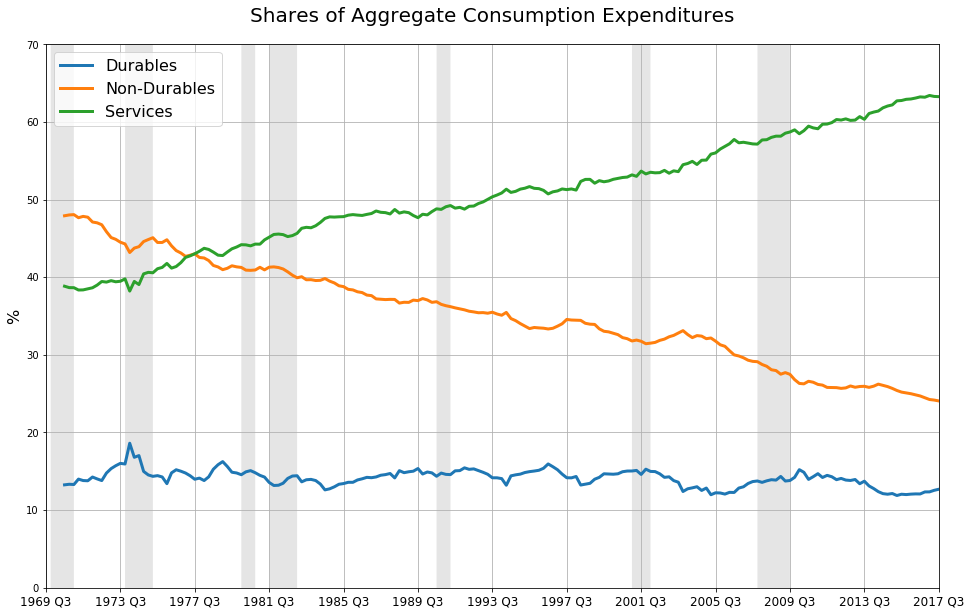

In [7]:
#since fill_between mathod doesnt work well with datetype64, we need to transform it
finally_=t.date.values
fig, ax=plt.subplots(figsize=(16, 10))
ax.plot(finally_, t['dg'], label='Durables', linewidth=3) ## <--- make change: series_name, series_label
ax.plot(finally_, t['nd'], label='Non-Durables', linewidth=3) ## <--- make change
ax.plot(finally_, t['esv'], label='Services', linewidth=3) ## <--- make change

#transform the shaded area into rectangle
import matplotlib.transforms as mtransforms
trans = mtransforms.blended_transform_factory(ax.transData, ax.transAxes)
ax.fill_between(finally_, t['+nber'], t['-nber'], facecolor='gray', interpolate=False, transform=trans, alpha=0.2)

#set the horizontal label as transformed data type
ax.set_xlim([t.date[t.index[0]], t.date[t.index[-1]]])
real_date=[]
trans_date=[]
for i in range(13): ## <--- make change: date displayed in the horizontal axis may vary
    real_date.append(t.date[t.index[16*i]])
    trans_date.append(t.new_date[t.index[16*i]])
ax.set_xticks(real_date)
ax.set_xticklabels(trans_date, fontsize=12)

ax.grid()
ax.set_ylim(0, 70) ## <--- make change: ibid
ax.set_ylabel("%", fontsize=16)
ax.legend(loc='best', fontsize=16)
ax.set_title("Shares of Aggregate Consumption Expenditures", fontsize=20, position=[.5, 1.03])
## <--- make change: graph title
plt.show()